In [2]:
import torch
from torch import nn
from d2l import torch as d2l


- 对于每个 $\theta$，都可以找到$\lambda$使得之前的目标函数等价于下面的
  $$ min \mathcal{l}(w,b)+\frac{\lambda}{2}\parallel{w} \parallel^2$$

- 超参数$\lambda$控制了正则项的重要程度
- - $\lambda = 0$:无作用
- - $\lambda \rightarrow \infty,w^* \rightarrow 0$

In [3]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1))*0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)


In [9]:
train_data[0].shape

torch.Size([20, 200])

In [10]:
def init_params():
    w=torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b=torch.zeros(1,requires_grad=True)
    print(b)
    return [w,b]

In [11]:
def l2_penalty(w):
    return torch.sum(w.pow(2))/2

In [12]:
init_params()

[tensor([[-1.4623],
         [-1.2272],
         [ 0.0890],
         [ 1.5023],
         [-1.1456],
         [-0.0930],
         [ 0.3149],
         [ 2.8507],
         [-0.5092],
         [ 2.1306],
         [ 1.7314],
         [ 1.0160],
         [-1.1666],
         [ 0.7942],
         [ 1.1109],
         [ 0.4080],
         [-0.0732],
         [-1.7811],
         [ 0.9469],
         [ 1.6748],
         [-1.0035],
         [ 0.0036],
         [-1.5011],
         [-0.8691],
         [ 0.3249],
         [-0.9959],
         [ 0.9742],
         [ 0.8504],
         [ 1.3692],
         [-3.0043],
         [ 0.7896],
         [ 1.4861],
         [ 1.0396],
         [-0.0350],
         [-0.4386],
         [-1.0410],
         [ 0.0376],
         [-1.0761],
         [-1.0078],
         [ 0.7791],
         [ 0.8211],
         [ 0.3119],
         [-0.9439],
         [-1.6386],
         [ 1.2165],
         [-0.7040],
         [-1.4596],
         [ 0.3651],
         [ 0.4569],
         [ 1.1719],


In [15]:
def train(lambd):
    w,b=init_params()
    net,loss=lambda X:d2l.linreg(X,w,b),d2l.squared_loss
    num_epochs,lr=100,0.003
    animator=d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            l=loss(net(X),y)+lambd*l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b],lr,batch_size)
        if (epoch+1)%5==0:
            animator.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),
                                  d2l.evaluate_loss(net,test_iter,loss)))
    print(f'w2的L2范数是：{torch.norm(w).item()}')

w2的L2范数是：13.245226860046387


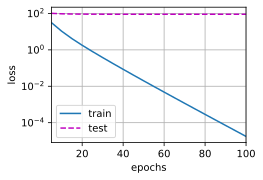

In [16]:
train(lambd=0)

w2的L2范数是：0.004730815999209881


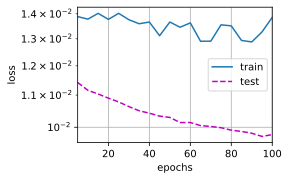

In [19]:
train(lambd=100)